# Principal Component Analysis with Cancer Data

In [39]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [40]:
# Load the dataset

can= pd.read_csv("breast-cancer-wisconsin-data.csv", sep=",")

# Top 10 rows
can.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [41]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
    

# Split X and Y for anaysis

X= can.drop(columns=['ID','Class'])
Y=can['Class']

# Displays unique class values

Y.unique()

array([2, 4], dtype=int64)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [42]:
## Datatype of each column

can.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [43]:
# Information about each column

can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [44]:
# Shape of the dataset

can.shape

# 699 rows and 11 columns

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [45]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

# Identify whether the columns have missing values

can[can.isnull().any(axis=1)]

# As can be seen below, there are no null values for any columns in teh given dataset

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [55]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?

# Bare Nuclei is the column of object type, hence we find whether the column has any corrupt values

#Renaming the columns to remove spaces in the names given, just for easier computation
can.rename(columns={'Bare Nuclei': 'BareNuclei', 'Cell Size': 'CellSize', "Cell Shape": "Cell Shape", "Marginal Adhesion": "MarginalAdhesion", "Single Epithelial Cell Size":"SingleEpithelialCellSize", "Normal Nucleoli": "NormalNucleoli", "Bland Chromatin":"BlandChromatin"}, inplace=True)

# To identify non-numeric values in Bare Nuclei
nonum = pd.DataFrame(can.BareNuclei.str.isdigit()) 
nonum[nonum['BareNuclei'] == False]

#We notice there're 16 rows with non-numeric values in the concerned column

can[~can.BareNuclei.str.isdigit()]


,ID,ClumpThickness,CellSize,Cell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [74]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Imputation of values for those 16 fields
med=can['BareNuclei'].mode()
#med

# Imputing the missing value with mode of the column
# Mode is considered as the column is not continuous and it gives the definite set of values
can['BareNuclei'].replace('?', med, inplace=True)



In [83]:

# Converting the datatype of BareNuclei column into an integer type

can['BareNuclei']=can['BareNuclei'].astype('int')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                          699 non-null int64
ClumpThickness              699 non-null int64
CellSize                    699 non-null int64
Cell Shape                  699 non-null int64
MarginalAdhesion            699 non-null int64
SingleEpithelialCellSize    699 non-null int64
BareNuclei                  699 non-null int32
NormalNucleoli              699 non-null int64
BlandChromatin              699 non-null int64
Mitoses                     699 non-null int64
Class                       699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [84]:
# Check for correlation of variable

can1=can.drop(columns='ID')
can1.corr()

,ClumpThickness,CellSize,Cell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
CellSize,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
MarginalAdhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
SingleEpithelialCellSize,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
BareNuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
NormalNucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
BlandChromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [0]:
# Inferences

# Clump Thickness has a high correlation with Cell Size, Cell shape and Class
# Cell Size has a very good correlation with Cell Shape, MarginalAdhesion, Single Cell Size, Normal Nucleoli, Bland Chromatin, Class
# Cell Shape has a good correlation with Cell Size, MarginalAdhesion, Single Cell Size, Bare Nuclei, Bland Chromatin, Class
# Marginal Adhesion and Single Cell size have a good correlation with Cell Size, Cell Shape, Normal Nucleoli, Class
# Bare Nuclei and Normal Nucleoli have a good correlation with Cell Size, Cell Shape, Marginal Adhesion, Class

# We notice that Class, which is a Target Variable, shows high correlation with most of these variables

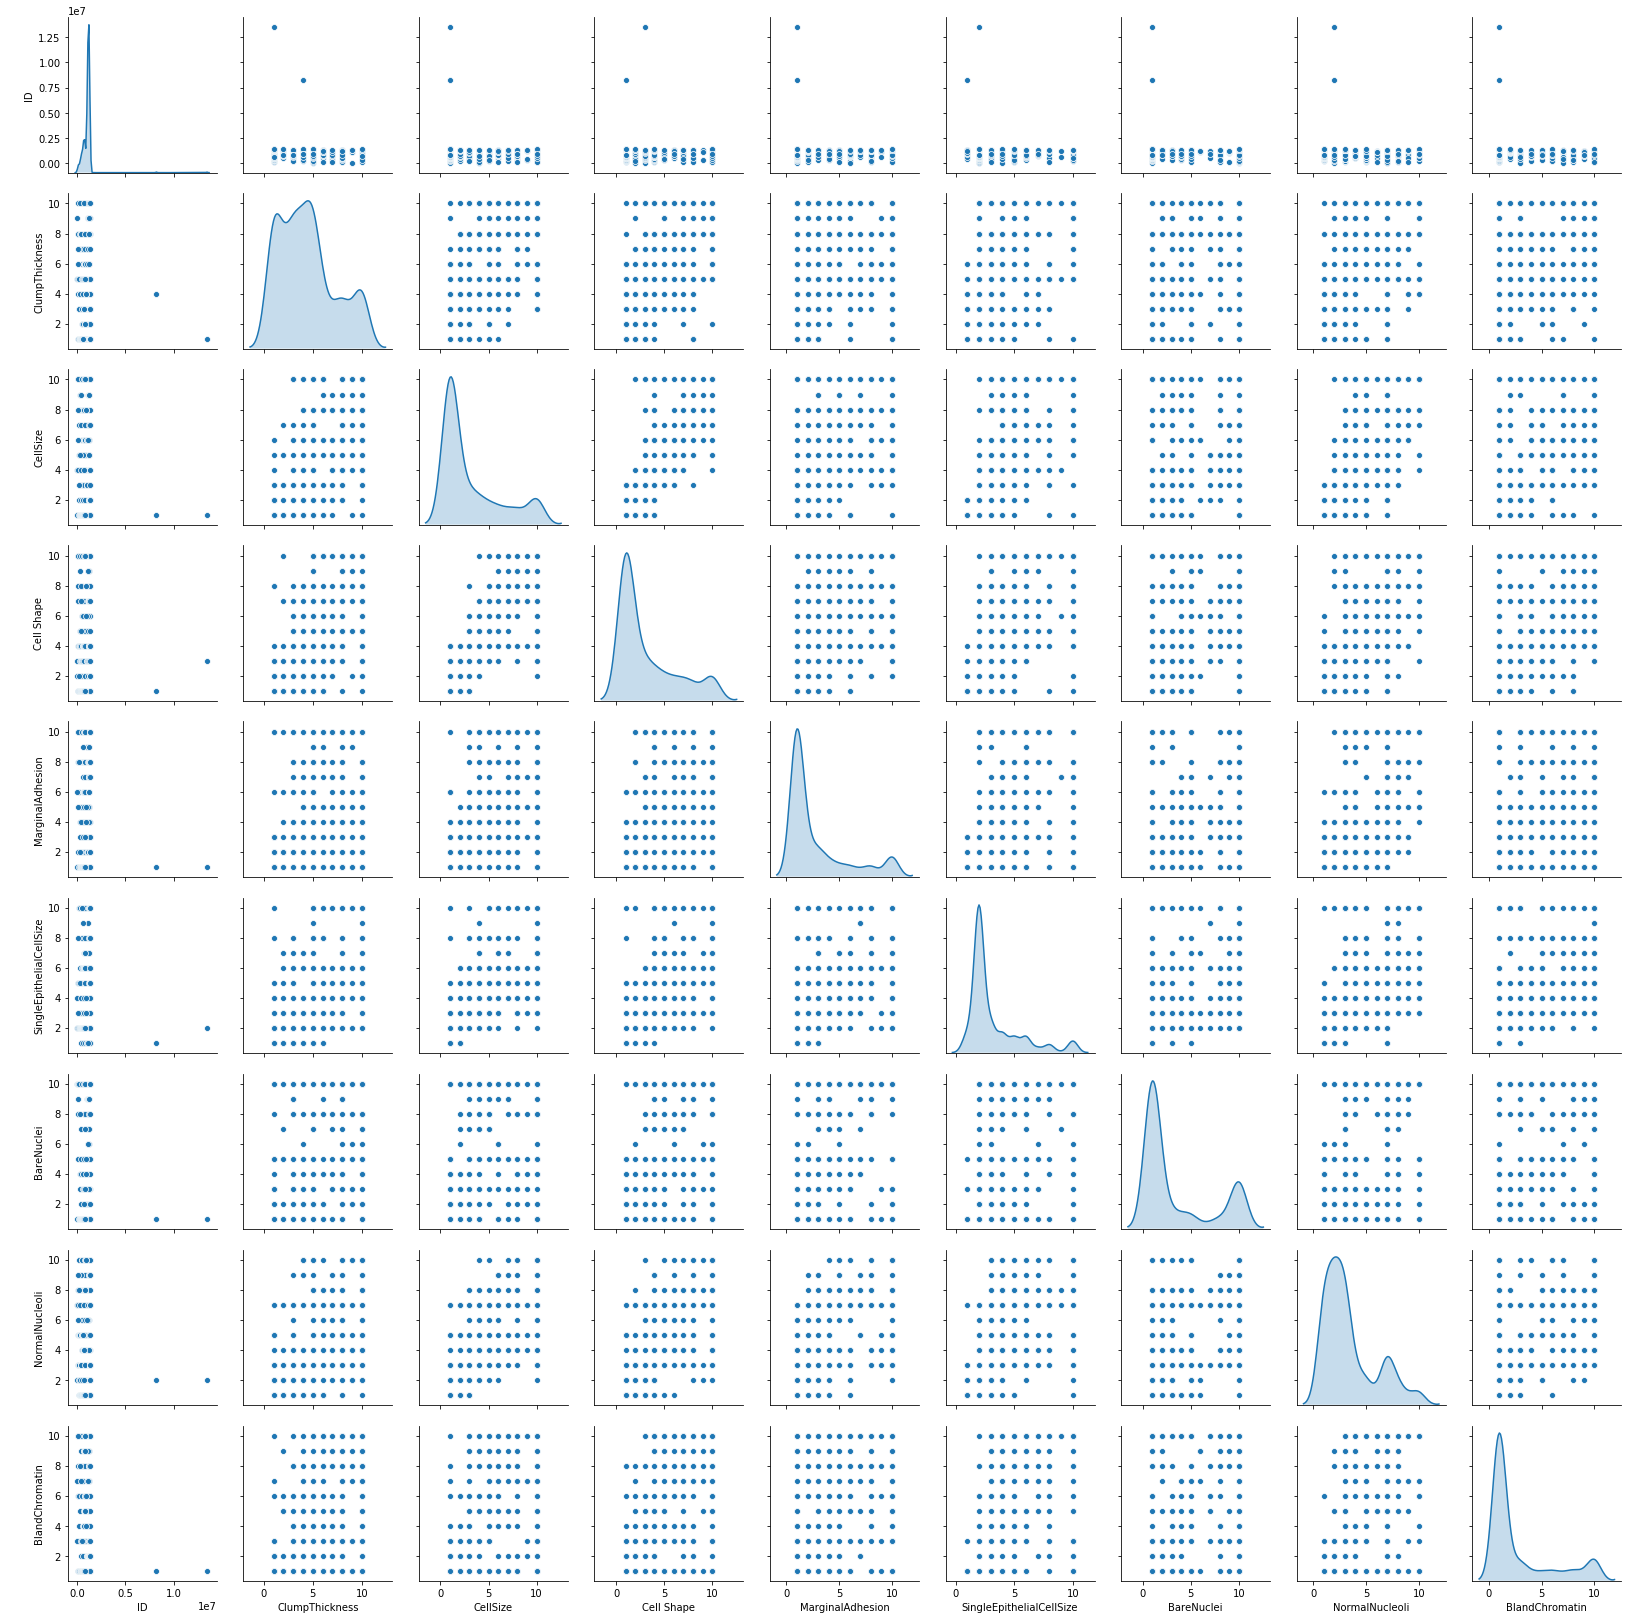

In [88]:
#Let us check for pair plots

import seaborn as sns
import matplotlib.pyplot as plt


can_att = can.iloc[:, 0:9]

sns.pairplot(can_att, diag_kind='kde')

In [0]:
# Inferences

# Gaussian or Normal curves show peak values in the lower ranges for all the columns. It signifies that the values are concentrated along the lowest bundary of values
# Most of the columns seem to have an uneven distribution between them. For instance, Cell size and BareNucei
# Cell Size and Cell Shape seem to have a close linear relationship or a trend for the higher range of values


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

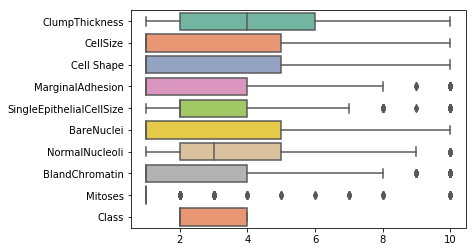

In [106]:
# Understand the outliers in each column
import seaborn as sns

a= list(can)

ax = sns.boxplot(data=can1, orient="h", palette="Set2")


In [112]:
# We infer that there're some outliers for columns Mitosis, BlandChromatin, SingleEpithelialCellSize, MarginalAdhesion
# Let's dig them individually

#Mitosis

can['Mitoses'].value_counts()

# We infer that the values beyond 4 seem to get reduced. Hence, we can combine and put those values beyong 4 as a single entity as teh variable is continuous too

can['Mitoses'] = np.where((can['Mitoses'] >= 4) , 4, can['Mitoses'])
can['Mitoses'].value_counts()





1    579
4     52
2     35
3     33
Name: Mitoses, dtype: int64

In [114]:
# Bland Chroamtin

can['BlandChromatin'].value_counts()

# Bucketing or IQR to deal with outliers may not be needed as the number of observations for each value is significant

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: BlandChromatin, dtype: int64

In [116]:
# For SingleEpithelialCellSize
can['SingleEpithelialCellSize'].value_counts()

# We notice that the number of observations for 9 and 10 are very minimal, hence we can put them together in the bucket of 8 to avoid outliers

can['SingleEpithelialCellSize'] = np.where((can['SingleEpithelialCellSize'] >= 8) , 8, can['SingleEpithelialCellSize'])

can['SingleEpithelialCellSize'].value_counts()

2    386
3     72
8     54
4     48
1     47
6     41
5     39
7     12
Name: SingleEpithelialCellSize, dtype: int64

In [119]:
# Standardize the variables


from scipy.stats import zscore
can1= can.drop(columns=['ID','Class'])
canz = can1.apply(zscore)

canz

,ClumpThickness,CellSize,Cell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.574467,-0.686979,-0.179662,-0.611825,-0.418112
1,0.206936,0.283845,0.266875,0.768621,1.979936,1.799664,-0.179662,-0.284112,-0.418112
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.574467,-0.410685,-0.179662,-0.611825,-0.418112
3,0.562336,1.595632,1.613773,-0.633247,-0.063586,0.141902,-0.179662,1.354454,-0.418112
4,-0.148465,-0.699995,-0.743299,0.067687,-0.574467,-0.686979,-0.179662,-0.611825,-0.418112
5,1.273138,2.251526,2.287222,1.820022,1.979936,1.799664,2.282766,1.354454,-0.418112
6,-1.214667,-0.699995,-0.743299,-0.633247,-0.574467,1.799664,-0.179662,-0.611825,-0.418112
7,-0.859266,-0.699995,-0.406574,-0.633247,-0.574467,-0.686979,-0.179662,-0.611825,-0.418112
8,-0.859266,-0.699995,-0.743299,-0.633247,-0.574467,-0.686979,-1.000471,-0.611825,2.993489
9,-0.148465,-0.372048,-0.743299,-0.633247,-0.574467,-0.686979,-0.590067,-0.611825,-0.418112


# Q6 Create a covariance matrix for identifying Principal components

In [124]:
# PCA
# Step 1 - Create covariance matrix

cov_mat=np.cov(canz.T)
cov_mat

array([[1.00143266, 0.64583645, 0.65552689, 0.48705303, 0.53758917,
        0.5908535 , 0.5592282 , 0.53660222, 0.40800705],
       [0.64583645, 1.00143266, 0.90818117, 0.70659267, 0.77393196,
        0.68765657, 0.75680368, 0.72390044, 0.50781935],
       [0.65552689, 0.90818117, 1.00143266, 0.68405782, 0.74354506,
        0.70848734, 0.73700282, 0.72047704, 0.47875736],
       [0.48705303, 0.70659267, 0.68405782, 1.00143266, 0.62481741,
        0.66792658, 0.66767051, 0.60421681, 0.47656852],
       [0.53758917, 0.77393196, 0.74354506, 0.62481741, 1.00143266,
        0.6122732 , 0.64069249, 0.6633509 , 0.50357664],
       [0.5908535 , 0.68765657, 0.70848734, 0.66792658, 0.6122732 ,
        1.00143266, 0.67518063, 0.5756016 , 0.43528712],
       [0.5592282 , 0.75680368, 0.73700282, 0.66767051, 0.64069249,
        0.67518063, 1.00143266, 0.66683179, 0.39349171],
       [0.53660222, 0.72390044, 0.72047704, 0.60421681, 0.6633509 ,
        0.5756016 , 0.66683179, 1.00143266, 0.48063034],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [125]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.30019113 -0.11922497  0.86849286 -0.00323059  0.0168803  -0.08278391
   0.22771774 -0.27899615 -0.06743935]
 [-0.37716939 -0.0886048  -0.03316853 -0.73601177 -0.19306097  0.20463935
  -0.4092071  -0.11054143  0.21968   ]
 [-0.37324035 -0.13570177  0.02218119  0.66336093 -0.17054895  0.18149408
  -0.56416036 -0.037873    0.14141646]
 [-0.33040459 -0.00283305 -0.38397321  0.04087111  0.48036265 -0.03525183
   0.08839352 -0.67654533 -0.21024022]
 [-0.34134124  0.06938537 -0.16125167  0.07057247 -0.34070497  0.63044003
   0.54233786  0.11018437 -0.1669844 ]
 [-0.33242655 -0.15919672  0.06131756 -0.07778869  0.58350102  0.07391071
  -0.10807221  0.62252496 -0.33043141]
 [-0.34241676 -0.26994073 -0.17999191  0.06334515  0.06877861 -0.35240985
   0.38359703  0.17972271  0.68198456]
 [-0.33364811  0.02771206 -0.16478856 -0.02785853 -0.47625219 -0.61888469
  -0.00981366  0.09975528 -0.48999774]
 [-0.25211392  0.92505011  0.08589686  0.02716259  0.12044643 -0.08341695
  -0.039

# Q8 Find variance and cumulative variance by each eigen vector

In [130]:
# Cumulative Variance by each eigen vector

a=np.cumsum(eig_vals)
a


array([6.00654326, 6.6974913 , 7.24021002, 7.3286983 , 7.80461357,
       8.16160576, 8.41576961, 8.72266775, 9.01289398])

In [128]:
# Variance by each eigen vector

eig_vals

array([6.00654326, 0.69094804, 0.54271872, 0.08848827, 0.47591527,
       0.3569922 , 0.25416384, 0.30689815, 0.29022623])

In [132]:
#Variance Ratio

b=np.sum(eig_vals)
c=np.divide(a,b)
c

# Inference

# To get an accuracy of over 95% we need to take into account 8 features, for over 90% we can consider just 6 features



array([0.66643891, 0.74310109, 0.8033169 , 0.81313486, 0.86593869,
       0.90554774, 0.93374776, 0.96779877, 1.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [133]:
# Finding principal components using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(canz)
X_pca = pca.transform(canz)

In [134]:
X_pca.shape

(699, 6)

In [135]:
pca.components_

array([[ 0.30019113,  0.37716939,  0.37324035,  0.33040459,  0.34134124,
         0.33242655,  0.34241676,  0.33364811,  0.25211392],
       [-0.11922497, -0.0886048 , -0.13570177, -0.00283305,  0.06938537,
        -0.15919672, -0.26994073,  0.02771206,  0.92505011],
       [-0.86849286,  0.03316853, -0.02218119,  0.38397321,  0.16125167,
        -0.06131756,  0.17999191,  0.16478856, -0.08589686],
       [-0.0168803 ,  0.19306097,  0.17054895, -0.48036265,  0.34070497,
        -0.58350102, -0.06877861,  0.47625219, -0.12044643],
       [-0.08278391,  0.20463935,  0.18149408, -0.03525183,  0.63044003,
         0.07391071, -0.35240985, -0.61888469, -0.08341695],
       [ 0.27899615,  0.11054143,  0.037873  ,  0.67654533, -0.11018437,
        -0.62252496, -0.17972271, -0.09975528, -0.09415152]])

In [136]:
pca.explained_variance_

array([6.00654326, 0.69094804, 0.54271872, 0.47591527, 0.3569922 ,
       0.30689815])

In [137]:
pca.explained_variance_ratio_

array([0.66643891, 0.07666217, 0.06021581, 0.05280382, 0.03960905,
       0.03405101])

In [ ]:
# We infer that the components, variance and variance ratio for 6 features is almost matching up over the eigen values and eigen vextors calculated above.
# pca computes all these values in the backend

# Q10 Find correlation between components and features

In [149]:
# Rows indicate the principal components
# Columns indicate the features

a=cov_mat
a1=(a.T/a.sum(axis=1)).T
a2=list(canz)
a3=pd.DataFrame(eig_vecs, columns=a2)
a3

        
    


,ClumpThickness,CellSize,Cell Shape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
0,-0.300191,-0.119225,0.868493,-0.003231,0.016880,-0.082784,0.227718,-0.278996,-0.067439
1,-0.377169,-0.088605,-0.033169,-0.736012,-0.193061,0.204639,-0.409207,-0.110541,0.219680
2,-0.373240,-0.135702,0.022181,0.663361,-0.170549,0.181494,-0.564160,-0.037873,0.141416
3,-0.330405,-0.002833,-0.383973,0.040871,0.480363,-0.035252,0.088394,-0.676545,-0.210240
4,-0.341341,0.069385,-0.161252,0.070572,-0.340705,0.630440,0.542338,0.110184,-0.166984
5,-0.332427,-0.159197,0.061318,-0.077789,0.583501,0.073911,-0.108072,0.622525,-0.330431
6,-0.342417,-0.269941,-0.179992,0.063345,0.068779,-0.352410,0.383597,0.179723,0.681985
7,-0.333648,0.027712,-0.164789,-0.027859,-0.476252,-0.618885,-0.009814,0.099755,-0.489998
8,-0.252114,0.925050,0.085897,0.027163,0.120446,-0.083417,-0.039381,0.094152,0.201801


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [213]:
# Import the dataset

joke=pd.read_csv('jokes.csv', sep=',')
joke

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [214]:
# Consider only 200 rows and all columns

ratings= joke.iloc[:200,1:]
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 Change the column indices from 0 to 99

In [215]:
# Change the column indices from 0 to 99

r=range(0,100)
ratings.columns=r
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [216]:
# Replace 99 with 0

ratings.replace(99.00,0, inplace=True)




# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [217]:
# Normalize using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ratings_diff_1=scaler.fit(ratings)
ratings_diff=scaler.transform(ratings)
print(ratings_diff)

ratings_diff=pd.DataFrame(ratings_diff)
ratings_diff


[[-1.85701632  1.67164929 -2.21918089 ... -0.02685824 -0.04144395
  -0.16095388]
 [ 0.78949409 -0.1802773   1.3727099  ...  0.07059963 -1.36765027
   0.16746078]
 [-0.11788091 -0.12112987 -0.0532842  ... -0.02685824 -0.04144395
  -0.16095388]
 ...
 [ 0.46479617 -0.89412566 -0.3156133  ... -0.23610604  0.18266036
  -0.02590486]
 [-0.11788091 -0.12112987 -0.0532842  ... -0.02685824 -0.04144395
  -0.16095388]
 [ 1.12308784 -1.60593445 -1.07569506 ... -0.02685824 -0.04144395
  -0.16095388]]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [223]:
a=list(ratings_diff.columns)
c=[]

for i in a:
    #print("Mean of {} is {}".format(i, ratings_diff[i].mean(axis=0)))
    c.append(ratings_diff[i].mean(axis=0))
c 

[-1.1102230246251566e-17,
 -9.658940314238862e-17,
 -4.107825191113079e-17,
 3.7192471324942746e-17,
 -8.881784197001253e-18,
 -2.636779683484747e-18,
 -1.6653345369377347e-18,
 2.3314683517128286e-17,
 -4.3298697960381107e-17,
 -2.55351295663786e-17,
 -4.5519144009631415e-17,
 -8.604228440844963e-17,
 6.661338147750939e-17,
 5.467848396278896e-17,
 -2.1649348980190553e-17,
 -1.0658141036401502e-16,
 1.6375789613221058e-17,
 2.3314683517128286e-17,
 -9.159339953157542e-18,
 2.997602166487923e-17,
 1.0658141036401502e-16,
 1.7208456881689926e-17,
 -2.7755575615628914e-17,
 4.3298697960381107e-17,
 -3.8857805861880476e-17,
 -1.4988010832439614e-17,
 -3.9968028886505634e-17,
 -9.436895709313831e-18,
 -5.2735593669694933e-17,
 1.9984014443252817e-17,
 -9.992007221626408e-18,
 -1.0325074129013956e-16,
 1.2212453270876722e-17,
 -1.2212453270876722e-17,
 -7.549516567451065e-17,
 3.2474023470285827e-17,
 3.858025010572419e-17,
 -2.6090241078691177e-17,
 -2.3869795029440865e-17,
 1.276756478318

In [240]:
# Joke ID vs Mean

d=pd.DataFrame(c,a,columns=['mean'])
d

,mean
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18
5,-2.636780e-18
6,-1.665335e-18
7,2.331468e-17
8,-4.329870e-17
9,-2.553513e-17


# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [242]:
# Top 10 Joke IDs with the mean

c=d.sort_values(by='mean',ascending=False)
c.head(10)

,mean
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
